# EDA (Exploratory Data Analysis) of the dataset

In this notebook, explore the Abalone dataset, by showing relevant visualizations that help understand the problem you are modelling.

Please make sure to write down your conclusions in the final notebook and to remove these intructions.

# Imports

In [16]:
%load_ext autoreload
%autoreload 2

import pandas as pd
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

In [17]:
column_names = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]

df = pd.read_csv("../data/abalone.csv")

# EDA

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [19]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [20]:
print("Missing values by columns:")
print(df.isnull().sum())

Missing values by columns:
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


In [21]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


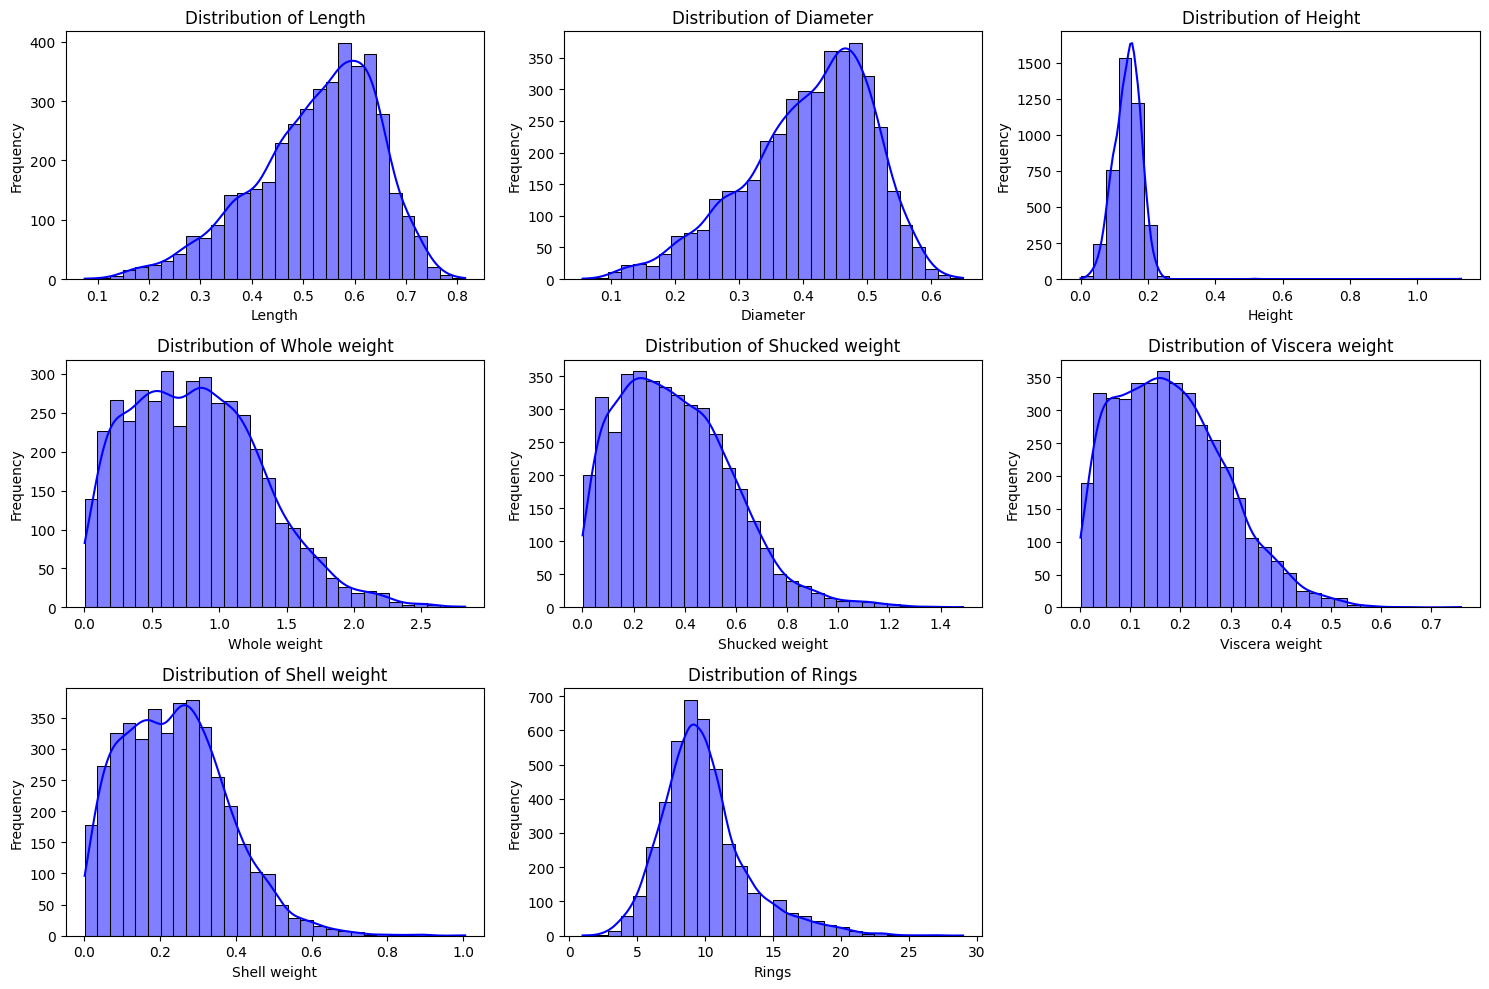

In [22]:
descriptive_stats = df.describe()
num_vars = df.select_dtypes(include=["float64", "int64"]).columns
plt.figure(figsize=(15, 10))
for i, var in enumerate(num_vars):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[var], bins=30, kde=True, color="blue")
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## Distribution Insights
Most numerical variables have a right-skewed distribution. This suggests that while many abalones have lower values, there are some that are significantly larger.
Height has some very low values, including zero, which could indicate measurement errors or young abalones.

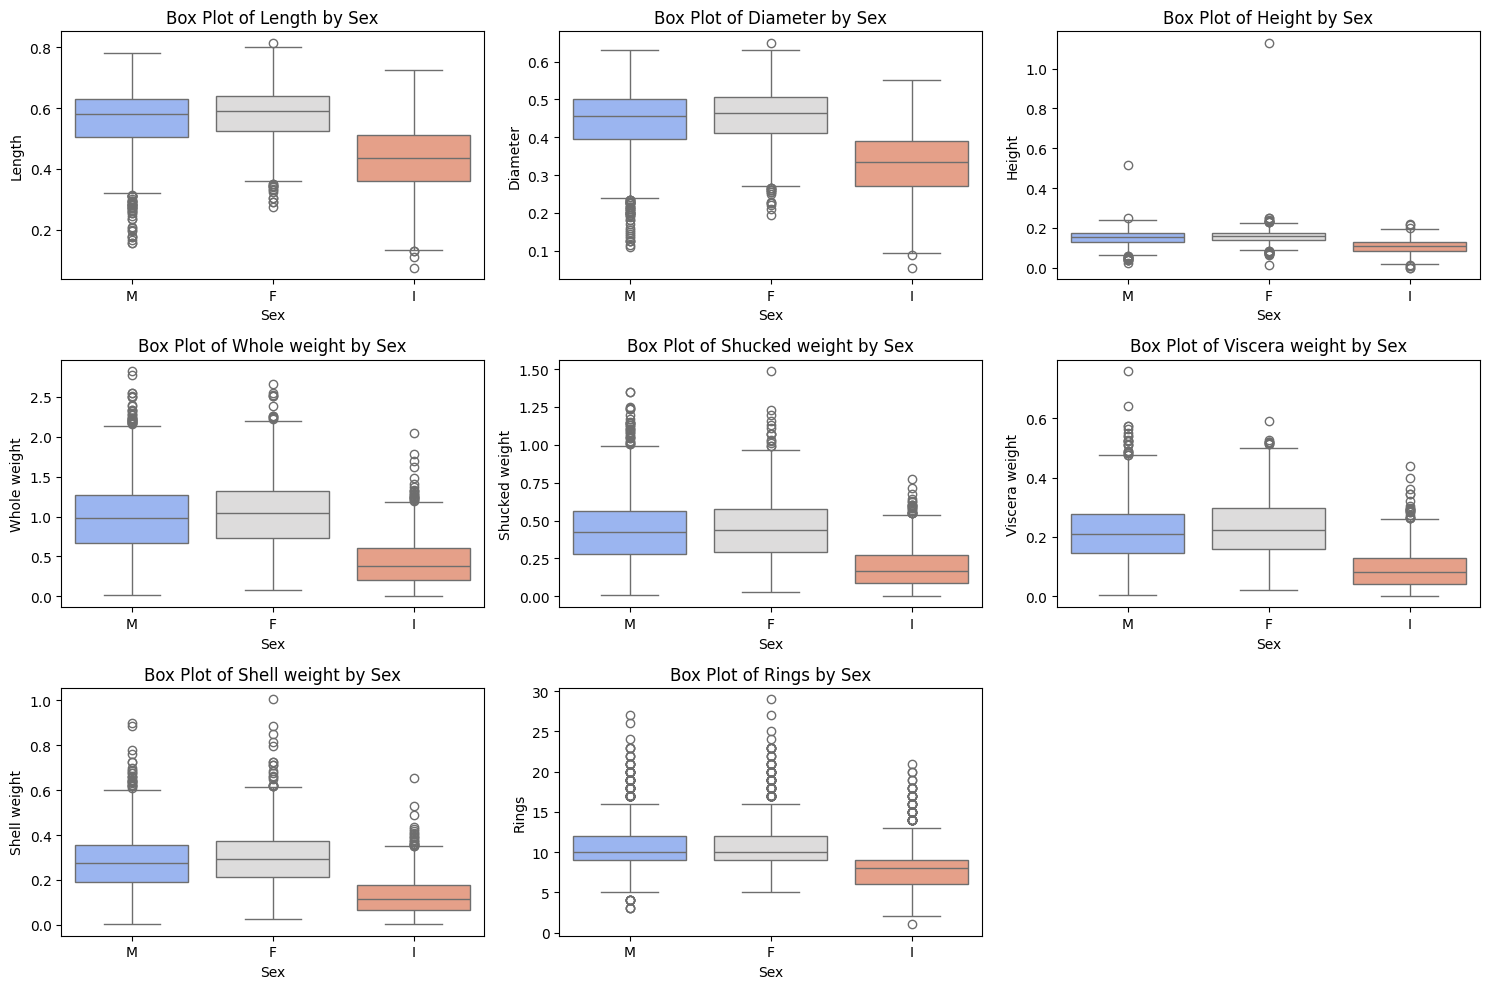

In [23]:
plt.figure(figsize=(15, 10))

# Plotting box plots for each numerical variable against Sex
for i, var in enumerate(num_vars):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x="Sex", y=var, data=df, palette="coolwarm", hue="Sex", legend=False)
    plt.title(f"Box Plot of {var} by Sex")
    plt.xlabel("Sex")
    plt.ylabel(var)

plt.tight_layout()
plt.show()

## Box Plot Analysis
The box plots show the distribution of numerical variables segmented by the sex of the abalone (Male, Female, and Infant).

Males and females exhibit similar distributions with slight variations, while infants generally have lower values across these dimensions.
There are some outliers in the male and female categories, particularly for Length and Diameter.

The weights show a clear separation among the three sexes, with males and females having higher weight distributions compared to infants.
The range for infants is noticeably lower, indicating they are typically lighter than adults.

Moreover, the distribution of rings shows that infants tend to have fewer rings (indicating younger age), while males and females have a wider range, with some individuals having a high number of rings.

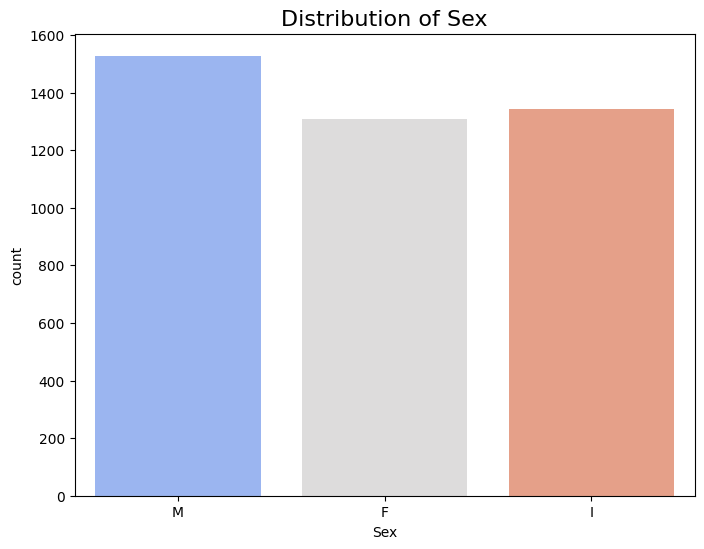

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Sex", data=df, palette="coolwarm", hue="Sex")
plt.title("Distribution of Sex", fontsize=16)
plt.show()

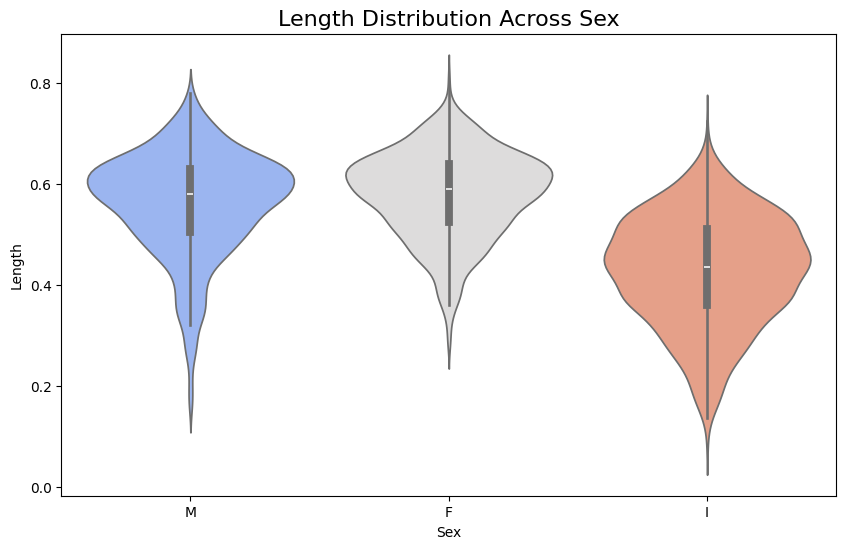

In [25]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Sex", y="Length", data=df, palette="coolwarm", hue="Sex")
plt.title("Length Distribution Across Sex", fontsize=16)
plt.show()

## Analysis of Sex
The counts of abalones by sex are as follows:

- Male (M): 1,528
- Female (F): 1,307
- Infant (I): 1,342

The distribution shows that males are the most prevalent, followed closely by infants, with females being slightly less common.

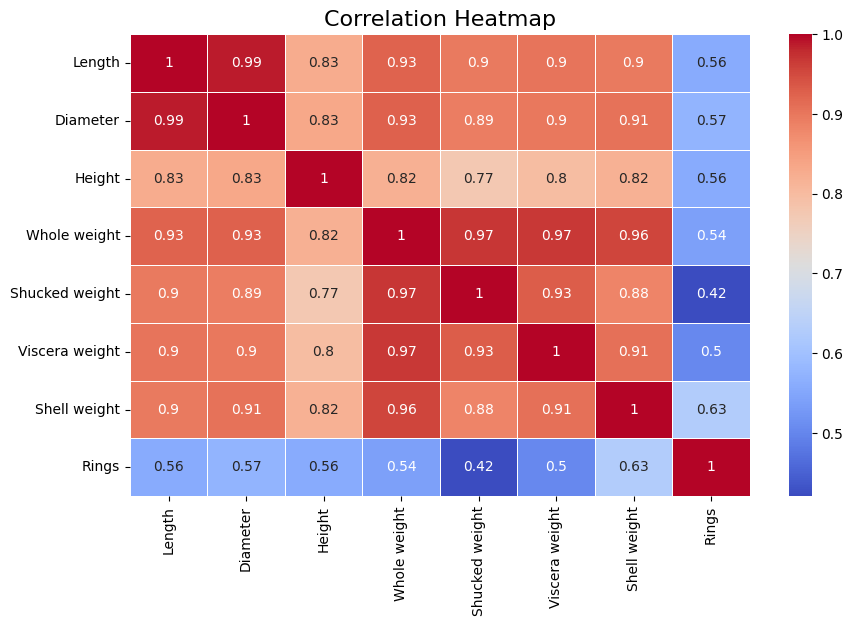

In [26]:
# Correlation matrix
plt.figure(figsize=(10, 6))
corr_matrix = df.drop(columns="Sex").corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

## Correlation Analysis

Length and Diameter (0.99) have a strong linear relationship.
Whole Weight has high correlations with all other weight metrics (e.g., Shucked Weight: 0.97, Viscera Weight: 0.97).
Shell Weight is also highly correlated with Whole Weight (0.96) and Diameter (0.91).

On the other side, Rings shows moderate correlations with Length (0.56) and Diameter (0.57), indicating that larger abalones tend to have more rings (i.e., are older).

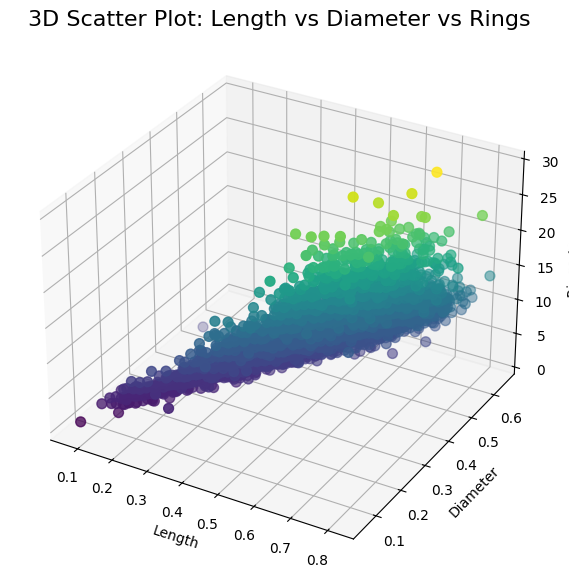

In [27]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    df["Length"], df["Diameter"], df["Rings"], c=df["Rings"], cmap="viridis", s=50
)

ax.set_xlabel("Length")
ax.set_ylabel("Diameter")
ax.set_zlabel("Rings (Age)")
plt.title("3D Scatter Plot: Length vs Diameter vs Rings", fontsize=16)
plt.show()

## Data Distribution

- Trend: There is a visible trend where both length and diameter increase as the number of rings increases. This suggests that older abalones (with more rings) tend to be larger in size. The color gradient from purple to yellow indicates point density. Areas with more dense points (e.g., lower lengths and diameters) are darker, while those with fewer points are lighter. This highlights that younger abalones tend to have smaller dimensions and fewer rings.

- Positive Correlation: The plot illustrates a positive correlation between length, diameter, and the number of rings. This aligns with biological expectations that larger abalones are older. There may be some outliers, especially at higher ring counts where the length and diameter might not align with the typical growth patterns (e.g., some abalones have a high number of rings but relatively smaller sizes).

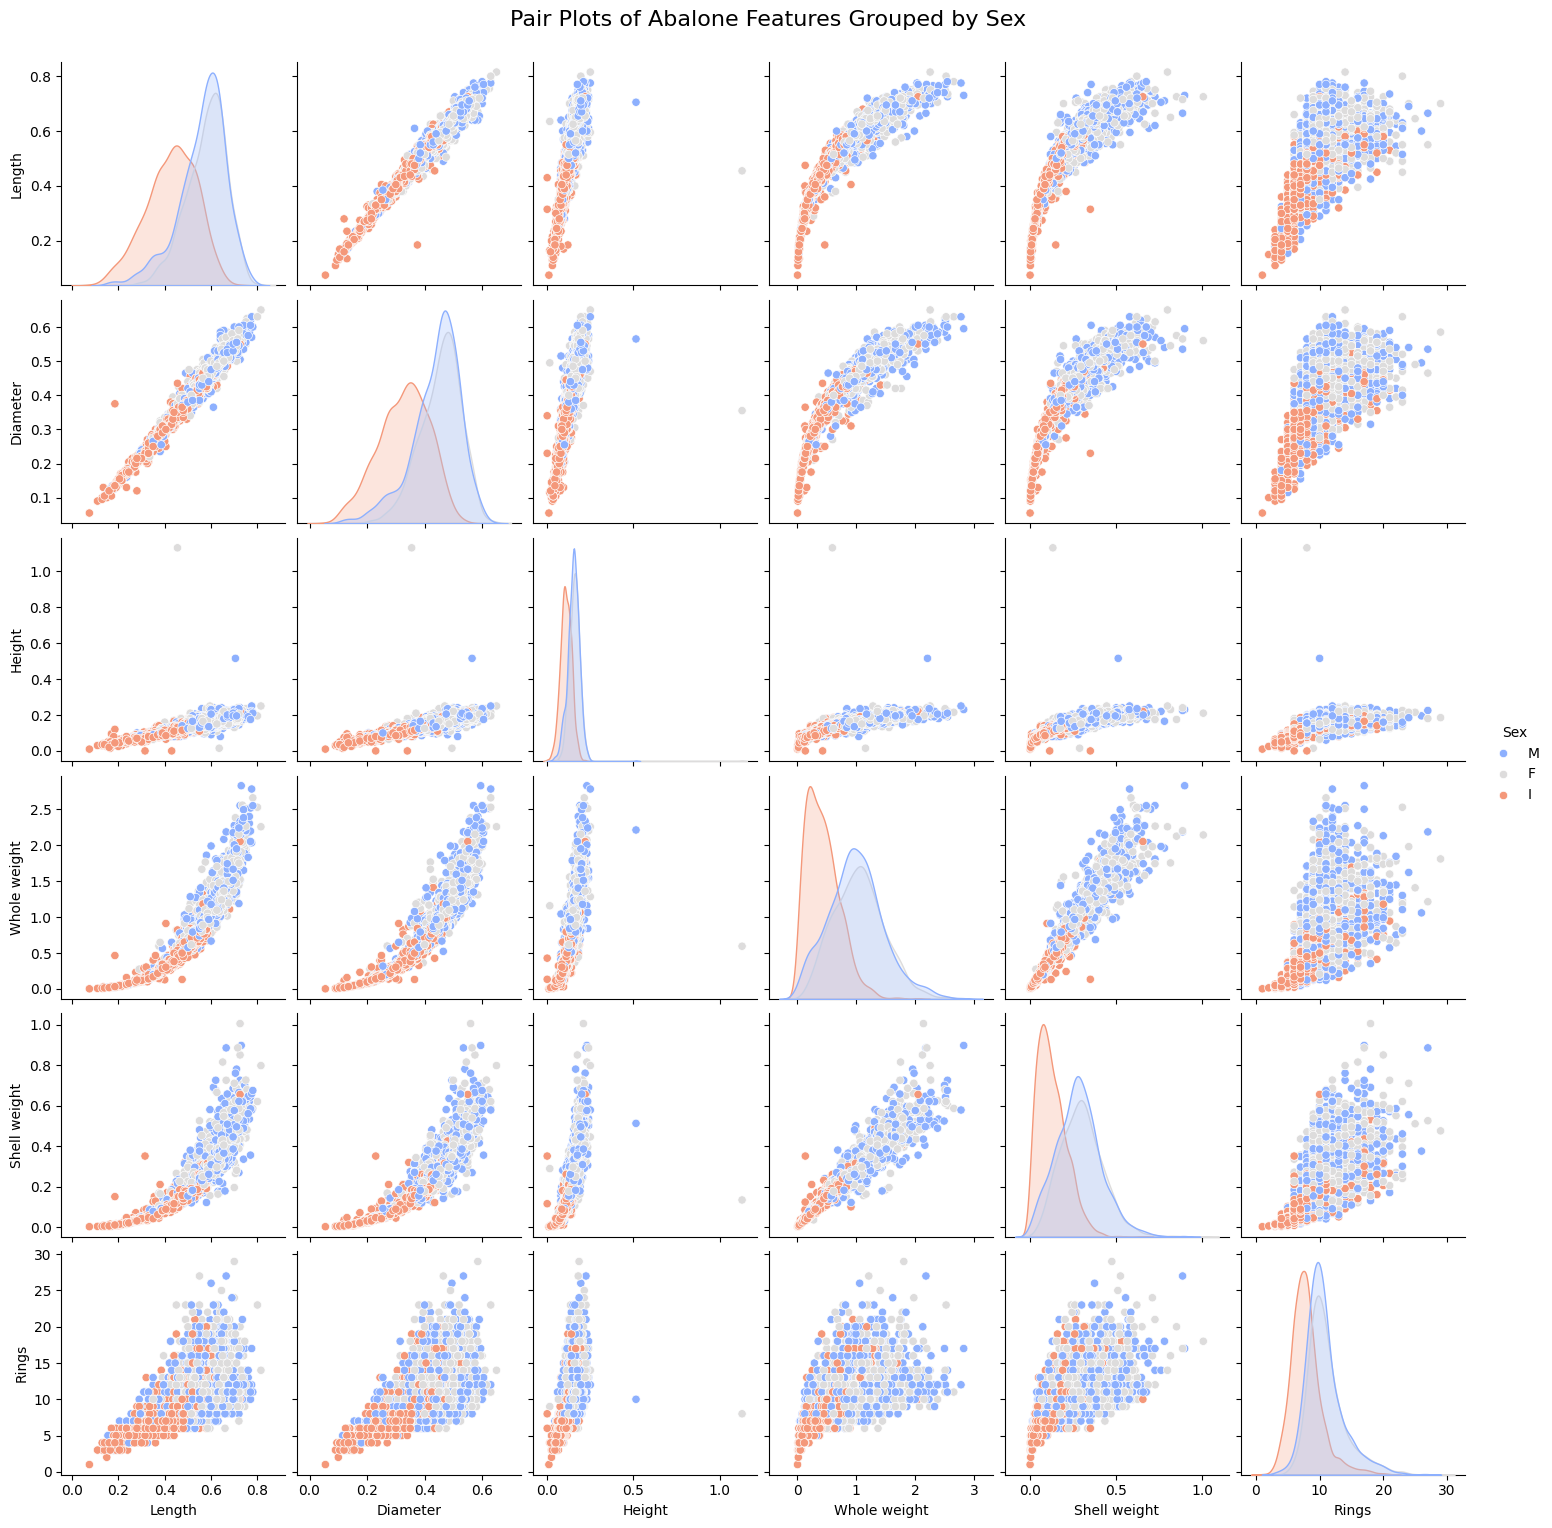

In [28]:
sns.pairplot(
    df[
        ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shell weight", "Rings"]
    ],
    hue="Sex",
    palette="coolwarm",
    diag_kind="kde",
)

plt.suptitle("Pair Plots of Abalone Features Grouped by Sex", y=1.02, fontsize=16)
plt.show()

### Positive Correlation: 

Length and Diameter show a strong linear relationship.
Weight Metrics (Whole Weight, Shucked Weight, etc.) correlate well with each other and also with Length and Diameter.
Rings also exhibit a positive correlation with the size and weight metrics, indicating that larger and heavier abalones tend to be older (more rings).

### Sex Differentiation:

Infants generally cluster at the lower end of most features (length, weight), indicating their smaller size and weight compared to adults.
Males and Females show overlapping distributions, but some plots, such as for Rings, suggest that males may have slightly larger sizes on average.

### Outliers and Density:

Notice that the density for Length and Diameter peaks at lower values, with a long tail toward higher values, indicating some larger abalones.
Outliers are visible in various scatter plots, particularly in the Rings plot, where some individuals have a high ring count but lower lengths or weights.

### Notable Patterns:

The plots indicate that as the size metrics (Length, Diameter, Weight) increase, the number of Rings also tends to increase, reflecting the expected biological growth pattern.
The scatter plots suggest that larger abalones have a wider range of age (rings) than smaller ones, as many small abalones have a low ring count.

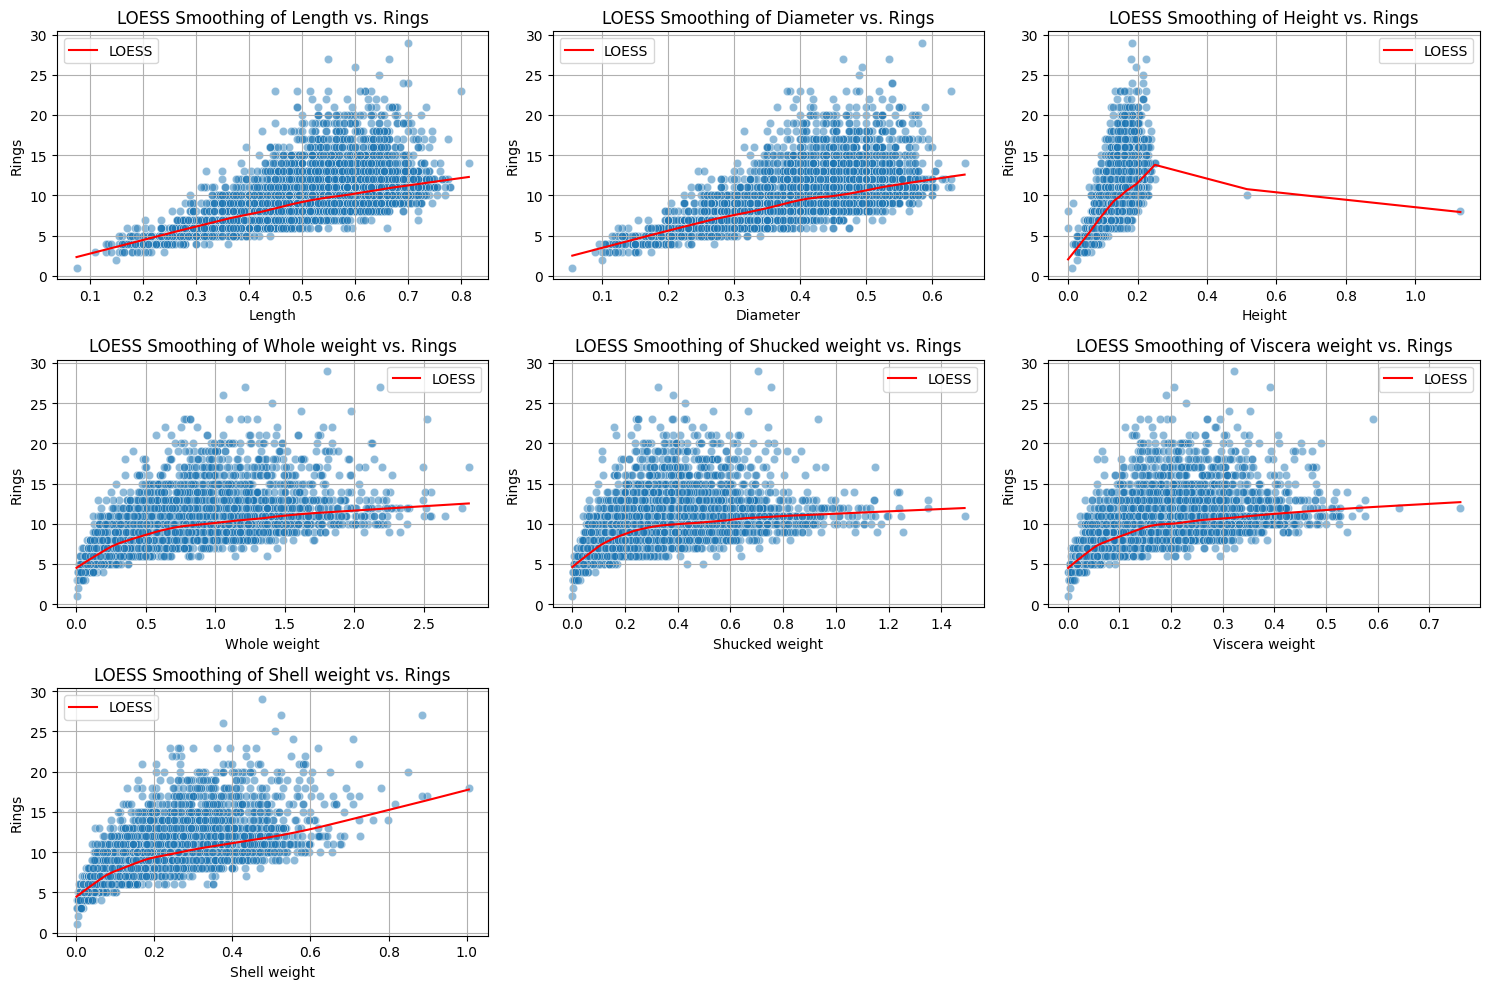

In [29]:
def loess_plot(ax, x, y, data, title):
    sns.scatterplot(x=x, y=y, data=data, ax=ax, alpha=0.5)
    lowess = sm.nonparametric.lowess(data[y], data[x], frac=0.3)
    ax.plot(lowess[:, 0], lowess[:, 1], color="red", label="LOESS")
    ax.set_title(title)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.legend()
    ax.grid()


# Generate LOESS plots for key features against 'Rings'
features = [
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
]
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
axs = axs.flatten()

for i, feature in enumerate(features):
    loess_plot(axs[i], feature, "Rings", df, f"LOESS Smoothing of {feature} vs. Rings")

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

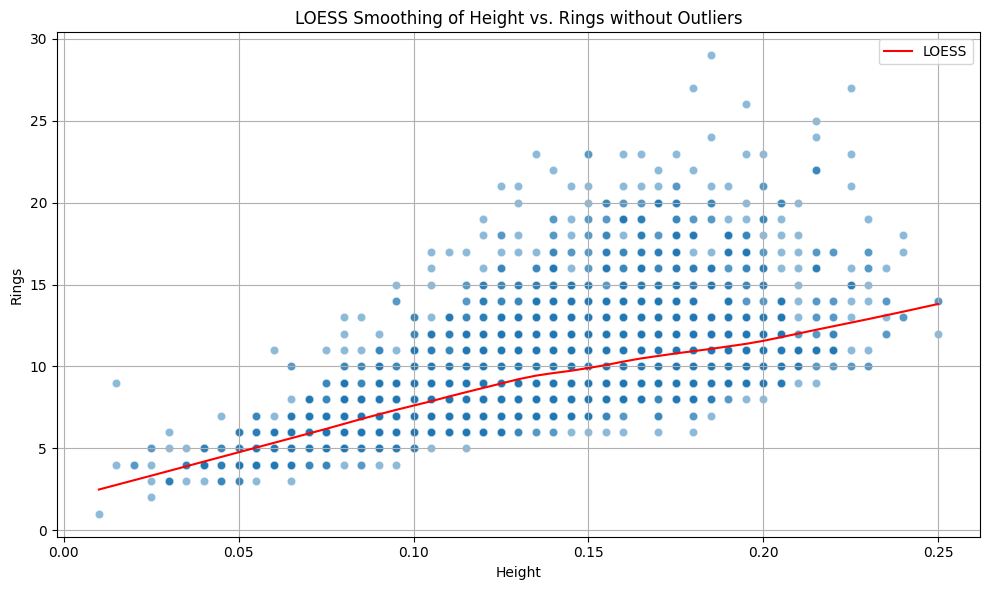

In [30]:
no_outlier_df = df[(df["Height"] > 0) & (df["Height"] < 0.5)]

fig, ax = plt.subplots(figsize=(10, 6))
loess_plot(
    ax,
    "Height",
    "Rings",
    no_outlier_df,
    f"LOESS Smoothing of Height vs. Rings without Outliers",
)

plt.tight_layout()
plt.show()

- Rings have weak correlation monotonic increasing relationship with whole weight, the shape of the loess line represents an approximate logarithmic curve. This is expected since different species of abalone have different sizes, so total weight would not give us much more information about rings.

- There is a weak monotonically linear relationship between rings and length. This is also expected since  increasing the ring size regardless of species increases their length, diameter and height as they add new growth rings to their shell. 

- Height is also strongly correlated with rings as it did with whole weight. This is more visible once outliers are removed.

- There is an approximately linear relationship between rings and shell weight. This makes sense as the number of rings increases, shell weight tends to increase as well.